In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import random

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={unit}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['clouds']['all']
        city_country = city_weather['clouds']['all']
        city_date = city_weather['clouds']['all']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | slavgorod
Processing Record 2 of Set 1 | timbuktu
Processing Record 3 of Set 1 | berdigestyakh
Processing Record 4 of Set 1 | aldan
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | mejit
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | canto do buriti
Processing Record 14 of Set 1 | paoua
Processing Record 15 of Set 1 | slave lake
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | tanjung pinang
Processing Record 20 of Set 1 | south hedland
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,slavgorod,52.9978,78.6449,-23.10,95,57,57,57,57
1,timbuktu,16.7735,-3.0074,21.46,18,1,1,1,1
2,berdigestyakh,62.0989,126.6992,-27.33,92,100,100,100,100
3,aldan,58.6031,125.3894,-32.00,97,100,100,100,100
4,blackmans bay,-43.0167,147.3167,16.52,61,65,65,65,65


In [15]:
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

In [16]:
# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,slavgorod,52.9978,78.6449,-23.10,95,57,57,57,57
1,timbuktu,16.7735,-3.0074,21.46,18,1,1,1,1
2,berdigestyakh,62.0989,126.6992,-27.33,92,100,100,100,100
3,aldan,58.6031,125.3894,-32.00,97,100,100,100,100
4,blackmans bay,-43.0167,147.3167,16.52,61,65,65,65,65


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

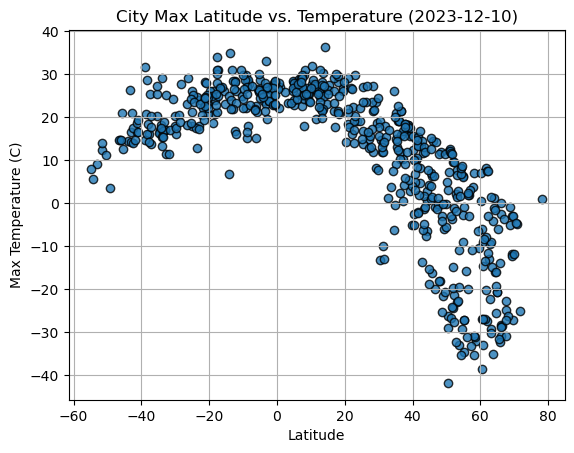

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature" + " (" + time.strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

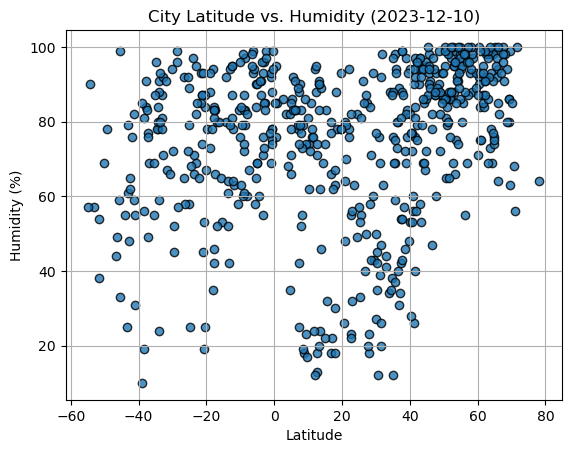

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + " (" + time.strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

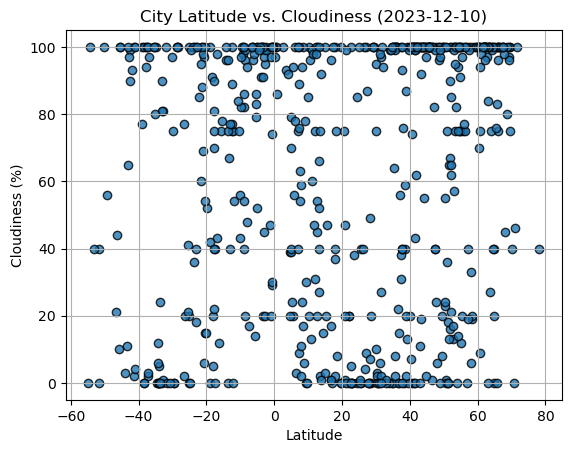

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " (" + time.strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

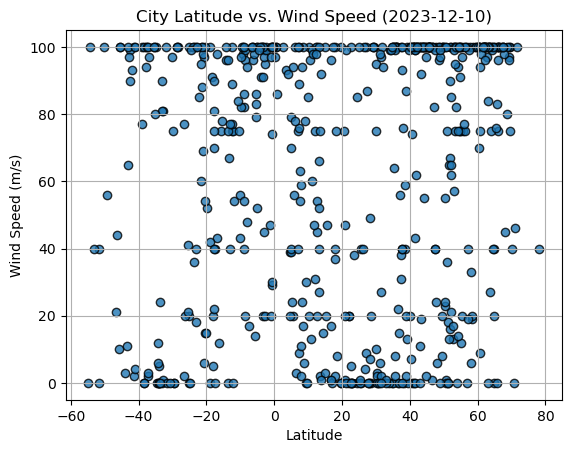

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " (" + time.strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, y_label, text_coord):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_equation, text_coord, fontsize=14, color="red")
    #plt.title(title)
    print(f"The r-value is: {r_value}")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,slavgorod,52.9978,78.6449,-23.10,95,57,57,57,57
1,timbuktu,16.7735,-3.0074,21.46,18,1,1,1,1
2,berdigestyakh,62.0989,126.6992,-27.33,92,100,100,100,100
3,aldan,58.6031,125.3894,-32.00,97,100,100,100,100
6,talnakh,69.4865,88.3972,-27.11,99,100,100,100,100


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,16.52,61,65,65,65,65
5,arraial do cabo,-22.9661,-42.0278,23.98,69,40,40,40,40
7,puerto natales,-51.7236,-72.4875,12.25,54,40,40,40,40
8,grytviken,-54.2811,-36.5092,5.62,90,100,100,100,100
10,hermanus,-34.4187,19.2345,16.95,78,0,0,0,0


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8082970945719054


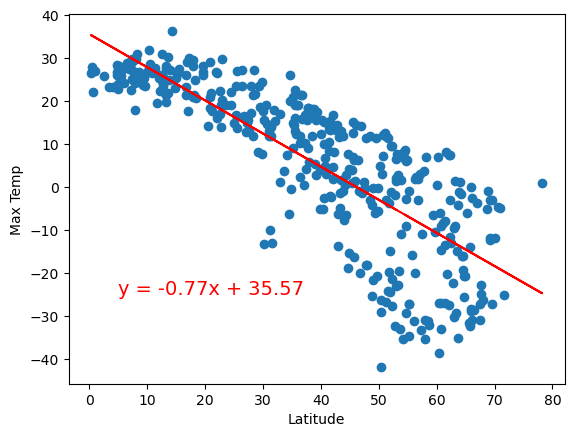

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
lin_reg_plot(x_values, y_values,'Max Temp',(5,-25))

The r-value is: 0.6260432970266104


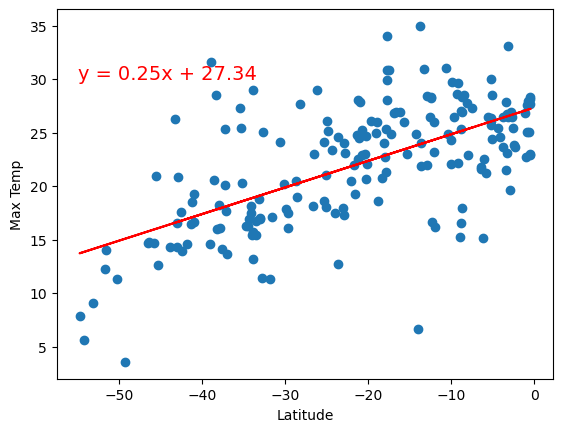

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
lin_reg_plot(x_values, y_values,'Max Temp',(-55, 30))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a robust negative correlation (r-value of -0.89) between latitude and temperature, suggesting that as we move away from the equator (Latitude 0), temperatures tend to decrease. Conversely, in the Southern Hemisphere, there exists a moderately positive correlation (r-value of 0.66) between latitude and temperature, indicating that temperatures generally increase as we approach the equator (Latitude 0). These correlations highlight the geographical influence on temperature trends based on the proximity to the equatorial region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4149898507793567


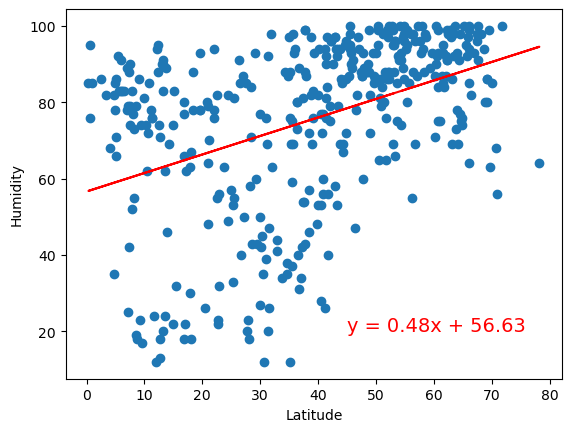

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
lin_reg_plot(x_values, y_values,'Humidity',(45, 20))

The r-value is: 0.32898859684388265


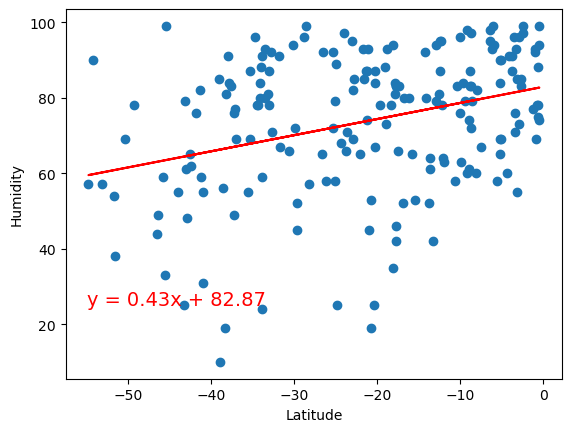

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
lin_reg_plot(x_values, y_values,'Humidity',(-55, 25))

**Discussion about the linear relationship:** Although the relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude - but tends to increase slightly towards the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24375187220468397


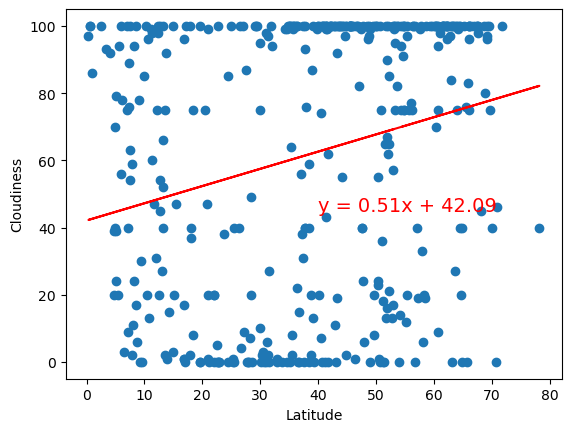

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
lin_reg_plot(x_values, y_values,'Cloudiness',(40, 45))

The r-value is: 0.24949415234773395


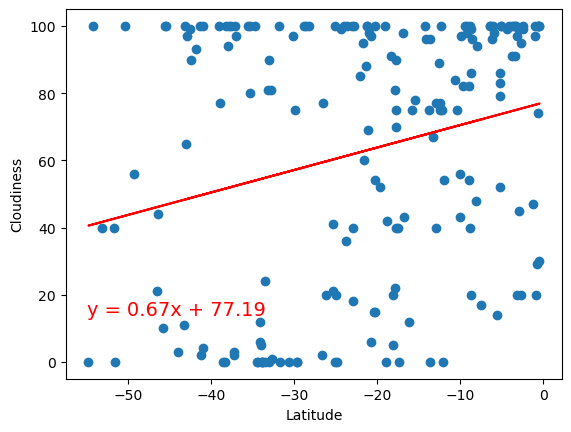

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
lin_reg_plot(x_values, y_values,'Cloudiness',(-55, 14))

**Discussion about the linear relationship:** There doesn't seem to be any correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24375187220468397


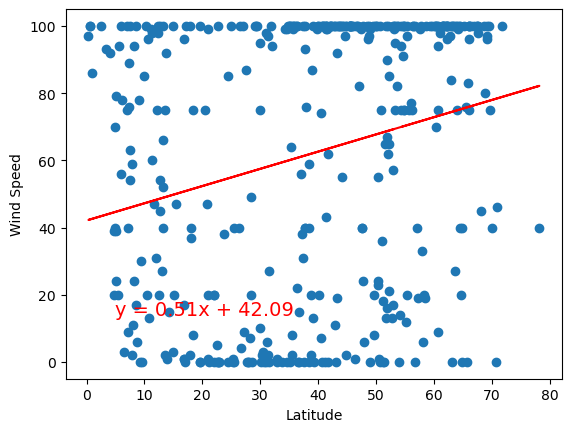

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
lin_reg_plot(x_values, y_values,'Wind Speed',(5, 14))

The r-value is: 0.24949415234773395


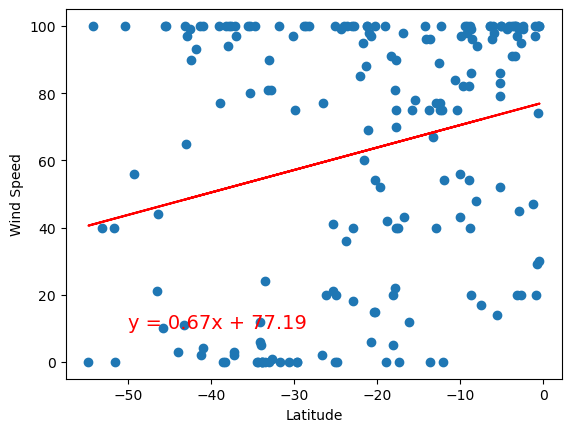

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
lin_reg_plot(x_values, y_values,'Wind Speed',(-50, 10))

**Discussion about the linear relationship:** There doesn't seem to be any correlation between latitude and wind speed.